# **ZOMATO** Analysis Project

We will analyze the Dataset and try to find the answers to the given questions:

### Q1) What type of restaurant do majority of customers order from?
### Q2) How many votes has each type of restaurant received from customers?
### Q3) What are the ratings that the majority of restaurants have received?
### Q4) Zomato has discovered that most of their customers, which are couples, order online. What is their average spending on orders?
### Q5) Which ordering mode (online or offline) have received more votes?
### Q6) Which type of restaurants received more offline orders?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Zomato data .csv")

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [11]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


## Data Cleaning and Processing

##### First we need to convert datatype in colummn **rate** from object to float. We will also remove '/5' from whole column as there's no need of it. We will define our own function Strip() to perform this task.

In [12]:
def Strip(val):
    val = str(val).split('/')
    val = val[0]
    return float(val)

df['rate'] = df['rate'].apply(Strip)

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [15]:
df['rate'].dtypes

dtype('float64')

So now we have converted the datatype of **rate** column from object to float and also we have cleaned the data as well.

### We are now done with Data Preprocessing and Cleaning. 
### Now we will proceed to find the answers to over Questions.

## Q1) What type of restaurant do majority of customers order from?

Text(0.5, 0, 'Type of Restaurant')

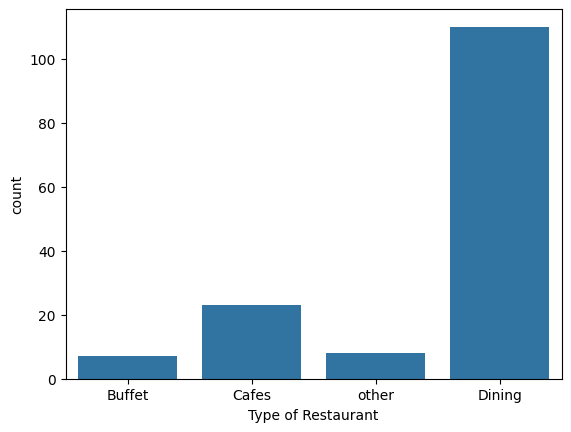

In [17]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

#### So majority of customers order from those Restaurants that fall in **Dining** Catgory.

## Q2) How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'votes')

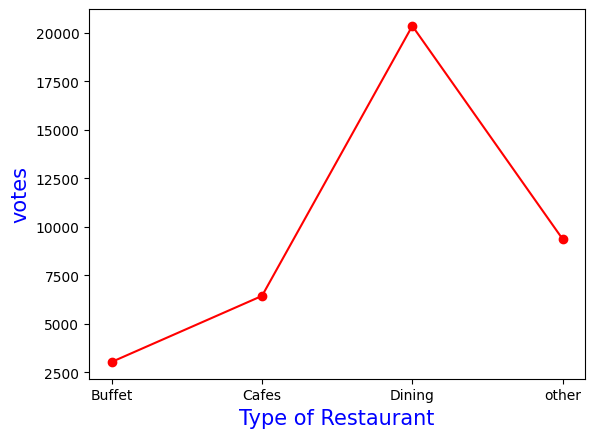

In [22]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = 'red', marker = 'o')
plt.xlabel("Type of Restaurant", c = "blue", size = 15)
plt.ylabel("votes", c = "blue", size = 15)

#### So we can onclude that **Dining** Restaurant have received most amount of Votes.

## Q3) What are the ratings that the majority of restaurants have received?

In [23]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


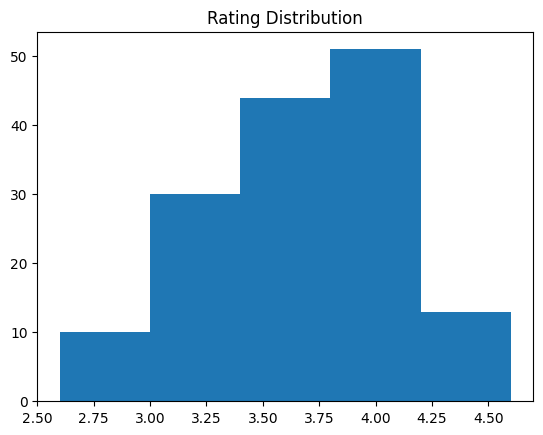

In [24]:
plt.hist(df['rate'], bins = 5)
plt.title("Rating Distribution")
plt.show()

#### So majority of Restaurants have received ratings between **3.75 to 4.25**

## Q4) Zomato has discovered that most of their customers, which are couples, order online. What is their average spending on each order?

In [25]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


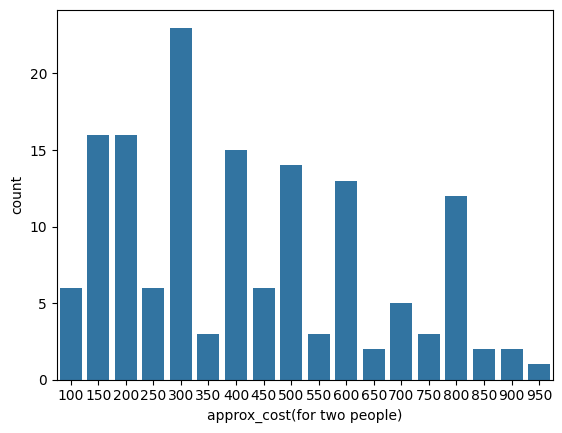

In [27]:
sns.countplot(x = df['approx_cost(for two people)'])
plt.show()

#### So mostly couples tend to spend 300 Rs on average on orders.

## Q5) Which ordering mode (online or offline) have received more votes?

In [28]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


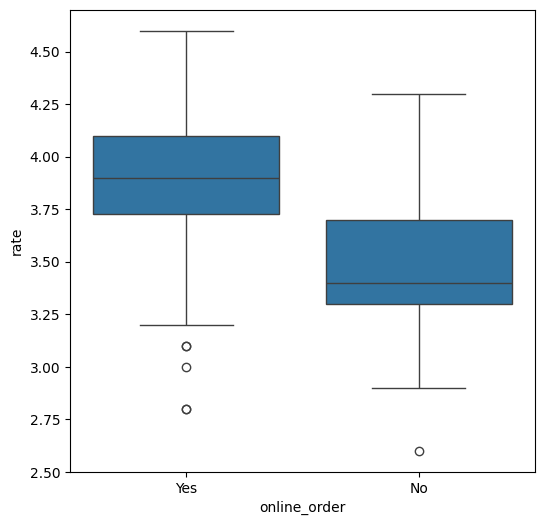

In [29]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.show()

#### Online orders receive more ratings (from 3.75 TO 4.25) than offline orders ratings (from 3.25 to 3.75).

## Q6) Which type of restaurants received more offline orders?

In [30]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


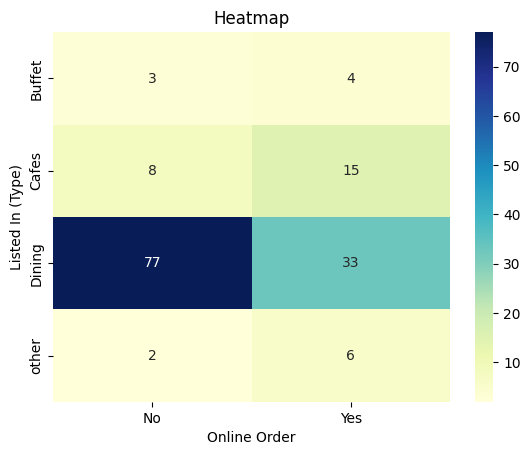

In [33]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

#### Dining Restaurants primarily take in-person orders whereas Cafes receives onilne orders mostly.